# Determining the exponent of power-law distributions

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

We are interested in finding the distribution function $f_Z(z)$ for a given distribution. The distribution we will be looking at is a large sample of uniform numbers to a given power. Below we draw our sample, $z$.

In [40]:
alpha = 1

z = np.random.rand(int(1e6), 1) ** (-(alpha + 1))

Next, we find the cumulative distribution from this random sample. We draw $z$ from a random uniform distribution in $[0, 1)$ and raise to the power $p$. We can now compute the cumulative distribution function by
\begin{align}
    P(Z > z) = N \sum_{i = 1}^{n} z_i,
\end{align}
where $z_i$ is the element in $z$ at position $i$ and $N$ is a normalization factor. We normalize by dividing by the largest number in the cumulative sum, i.e., the last number.

In [41]:
def compute_cdf(z):
    z_sum = np.cumsum(z)
    z_norm = z_sum[-1]

    return z_sum / z_norm

In [42]:
cdf_z = compute_cdf(z)

We plot the cumulative distribution function in a log-log plot in order to see the power-law type behaviour.

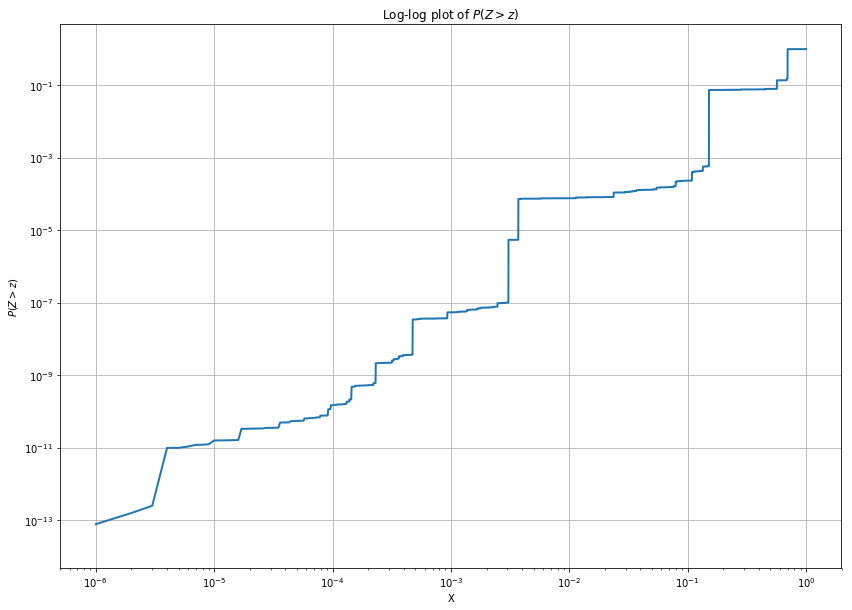

In [43]:
fig = plt.figure(figsize=(14, 10))

plt.loglog(np.linspace(0, 1, len(z)), cdf_z, lw=2)
plt.title(r"Log-log plot of $P(Z > z)$")
plt.xlabel(r"X")
plt.ylabel(r"$P(Z > z)$")
plt.grid()
plt.show()

Having found the cumulative distribution function, we can compute the actual underlying distribution function, $f_Z(z)$, from the cumulative distribution function by
\begin{align}
    f_Z(z) = \frac{\text{d} P(Z > z)}{\text{d} z}.
\end{align}
As the cumulative distribution function is given as an array, we use `np.gradient` to compute the derivative with respect to $z$.

In [31]:
f_z = np.gradient(cdf_z)

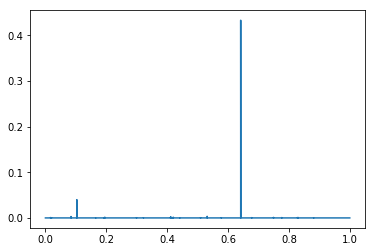

In [32]:
plt.plot(np.linspace(0, 1, len(f_z)), f_z)
plt.show()